# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [19]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [20]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [21]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
# Write your code here to read the data
df = pd.read_csv(r"foodhub_order.csv")

In [23]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [24]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the dataset provided


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [25]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Four columns (order_id, customer_id, food_preparation_time and delivery_time) are integers
* Four columns (restaurant_name, cuisine_type, day_of_the_week, rating) are strings as they are of object type eefectively constitutings the categorical variables
* One column is of data type float (cost_of_the_order)


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [26]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
* From the info results, there no non-null counts. 
* Running isnull check on the dataset also shows no column has missing value
* This means there are no missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [30]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: Food Preparation Time
* Minimum time taken - 20 minutes
* Average time taken - 27.4 minutes
* Maximum time taken - 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [47]:
# Write the code here
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: A total of 736 orders are not rated. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### a. OrderID

In [36]:
df.order_id.nunique()

1898

>> #### Observation: The dataset contains a total of 1898 orders

### b. CustomerID

In [38]:
df.customer_id.nunique()

1200

#### Observation: Only 1200 customers placed the orders. This implys some customers made more than one order

### c. Restaurant Name

In [35]:
df.restaurant_name.nunique()

178

In [39]:
df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

/home/mahakatas/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mahakatas/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


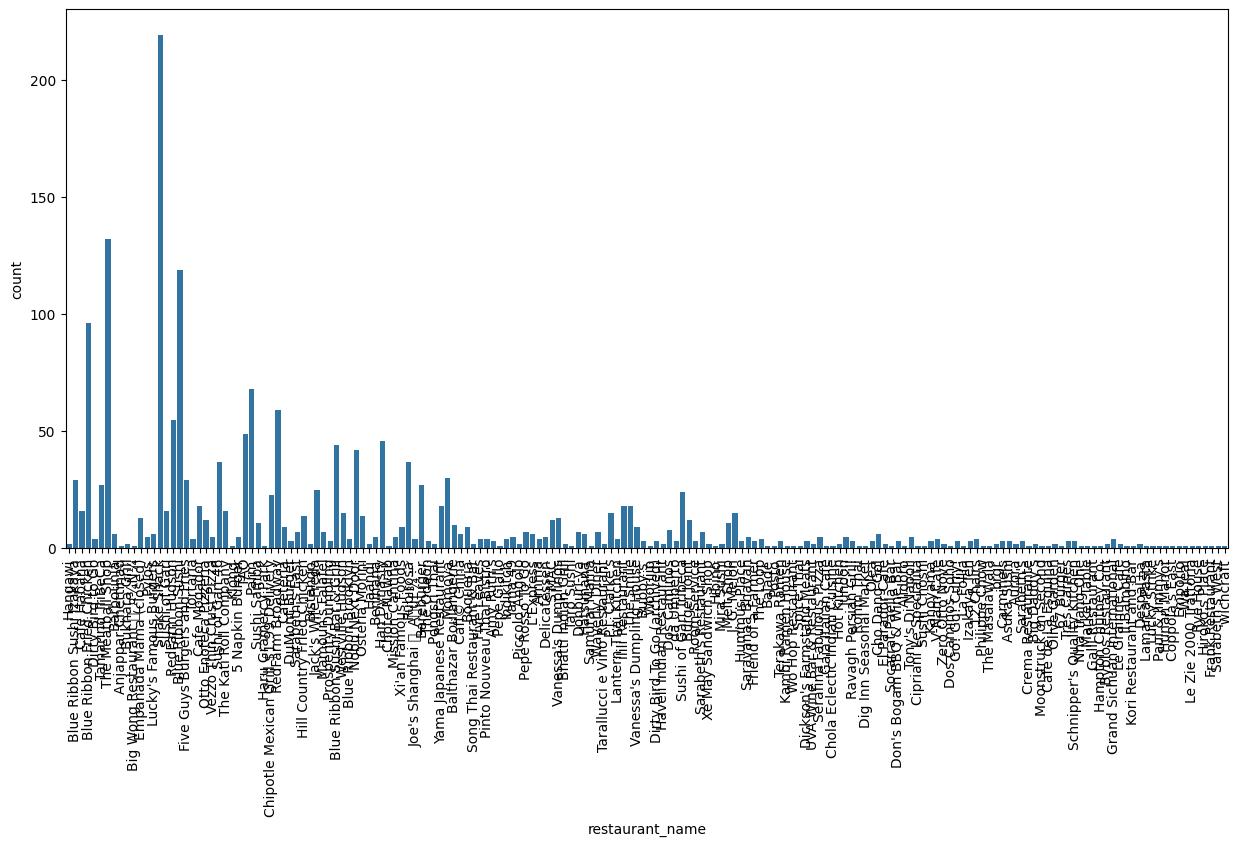

In [32]:
# Write the code here

plt.figure(figsize=(15, 7))
sns.countplot(data=df,x='restaurant_name', stat='count')
plt.xticks(rotation=90)
plt.show();

#### Observation: 
* There are 178 restaurants where orders have been placed. 
* Some of the restaurant names contain non alpha numerics. This can pause challenges in processing the data
* Order distribution among the restaurants is skewed to the right
* Four restaurants stand out as the most popular

### d. Cuisine Type

In [40]:
df.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

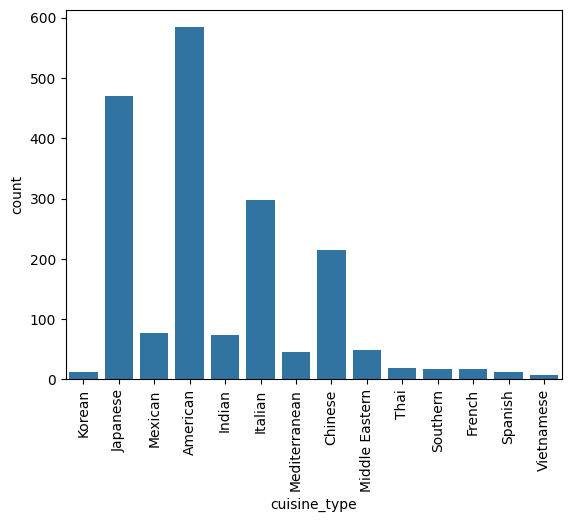

In [58]:
sns.countplot(data=df,x='cuisine_type',stat='count')
plt.xticks(rotation=90)
plt.show();

#### Observation: 
* There are 14 different cuisine types.
* Order distirbution among cuisines is slightly skewed to the right
* American and Japanese cuisine are the most popular

### e. Day of the week

In [41]:
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

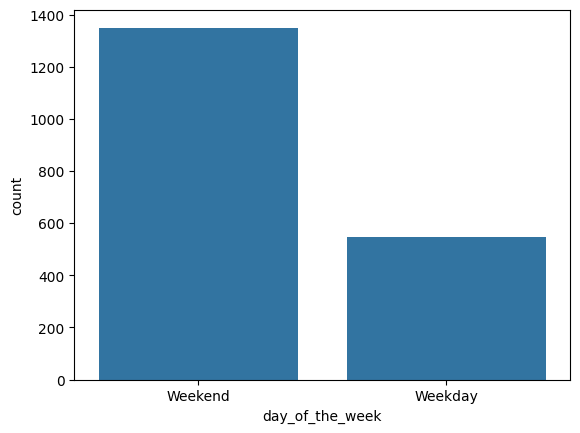

In [120]:
sns.countplot(data=df,x='day_of_the_week',stat='count')
plt.show();

#### Observation: 
* Days are categorised into either Weekday or Weekend
* There are twice as much orders on weekends as there are during weekdays

### f. cost_of_the_order

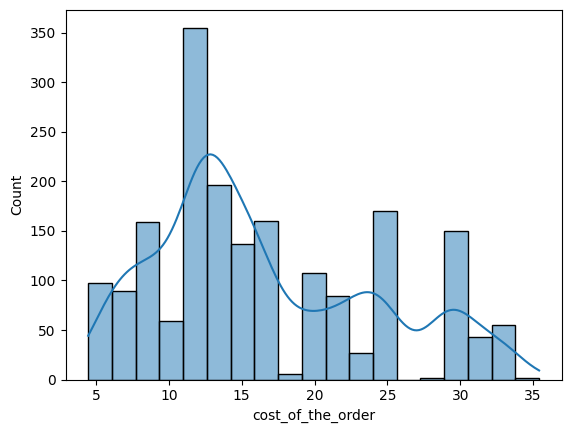

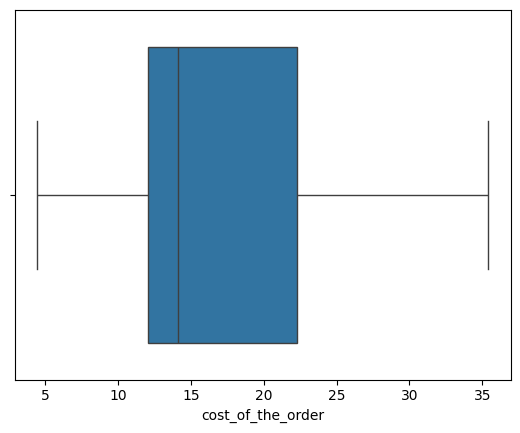

In [42]:
sns.histplot(data=df,x='cost_of_the_order',stat='count', kde="true")
plt.show();
sns.boxplot(data=df,x='cost_of_the_order')
plt.show();

#### Observation:
* DIstribution of the Cost of order is slighlty skewed to the right
* 50% of the orders cost between 12 and 23 dollars

### g. food_preparation_time

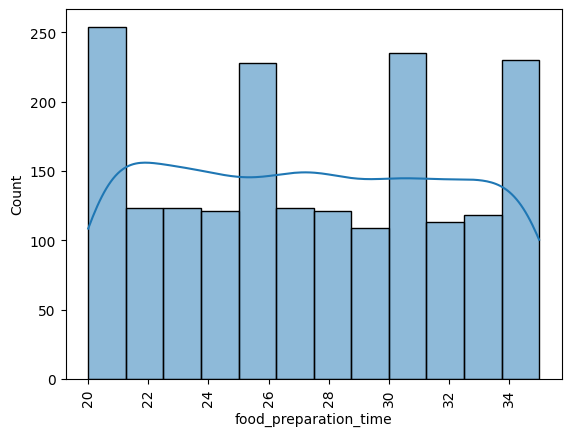

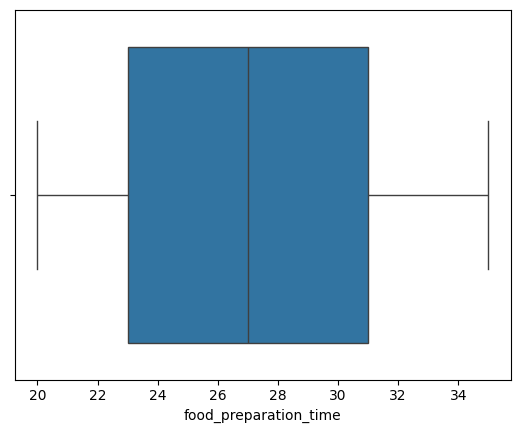

In [108]:
sns.histplot(data=df,x='food_preparation_time',stat='count', kde="true")
plt.xticks(rotation=90)
plt.show();
sns.boxplot(data=df,x='food_preparation_time')
plt.show();

#### Observation: Food preparation time is evenly distributed across all the orders

### h. delivery_time

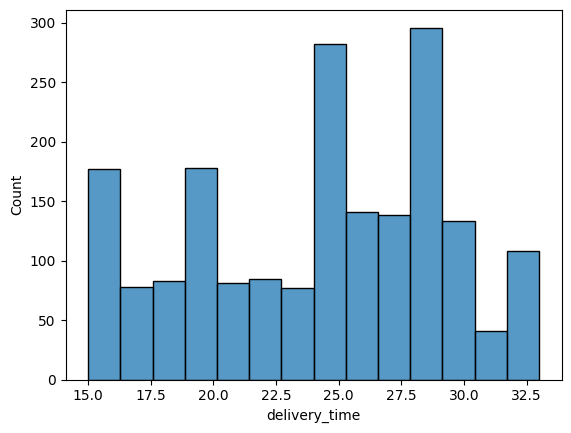

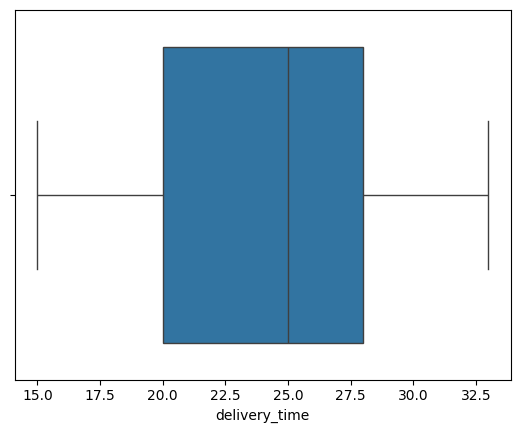

In [107]:
sns.histplot(data=df,x='delivery_time',stat='count')
plt.show();
sns.boxplot(data=df,x='delivery_time')
plt.show();

#### Observation:
* Delivery Time distribution is slightly skewed to the left
* 75 % of the orders take more than 20minutes to deliver

### i. Rating

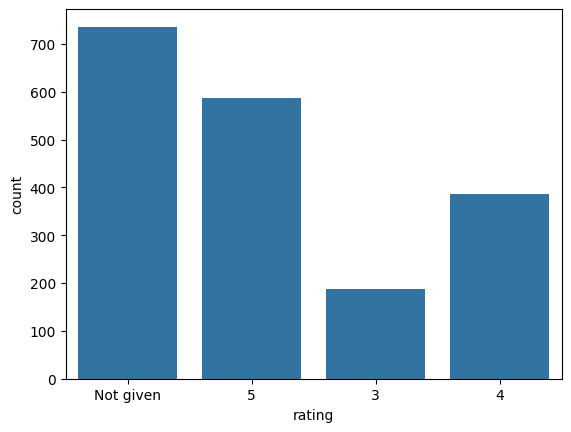

In [49]:
sns.countplot(data=df,x='rating',stat='count')
plt.show();

#### Observation: 
* The number of orders that were not rated is significantly high, having more counts than any other rating.
* Of the orders that were rated, most of them rated 5, followed by 4 with 3 having the least count

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [116]:
# Write the code here
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants with regards to number of orders are Shake Shack (219), The meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chiecken and Parm in that order.
* Shack Shack is the most popular having twice as much orders as The Meatball Shop which is next in popularity.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [118]:
# Write the code here
df.loc[df["day_of_the_week"] == "Weekend", "cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* During weekends, American Cuisine is the most popular, with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [56]:
orders_over_20 = df.loc[df["cost_of_the_order"] > 20, "cost_of_the_order"].count()
total_orders = df["cost_of_the_order"].count()
percentage_over_20 = (orders_over_20 / total_orders) * 100

print("Orders costing more than 20 are:", orders_over_20, "out of ", total_orders)
print("This makes it", round(percentage_over_20, 1),"% of all orders")

Orders costing more than 20 are: 555 out of  1898
This makes it 29.2 % of all orders


#### Observations:
* 29.2% of all orders cost more than 20dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [55]:
# Write the code here
print("Mean order delivery time is", round(df.delivery_time.mean(), 2))

Mean order delivery time is 24.16


#### Observations:
* The mean order delivery time is 24.16minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [115]:
# Write the code here
df.groupby("customer_id")["order_id"].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations: The top 3 most frequent customers qualifying for 20% discount are
1. Customer -> 52832 with 13 orders
2. Customer -> 47440 with 10 orders
3. Customer -> 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### a. Multivariate Analysis between Numericals

#### 1. Cost of the order vs Food Preparation Time

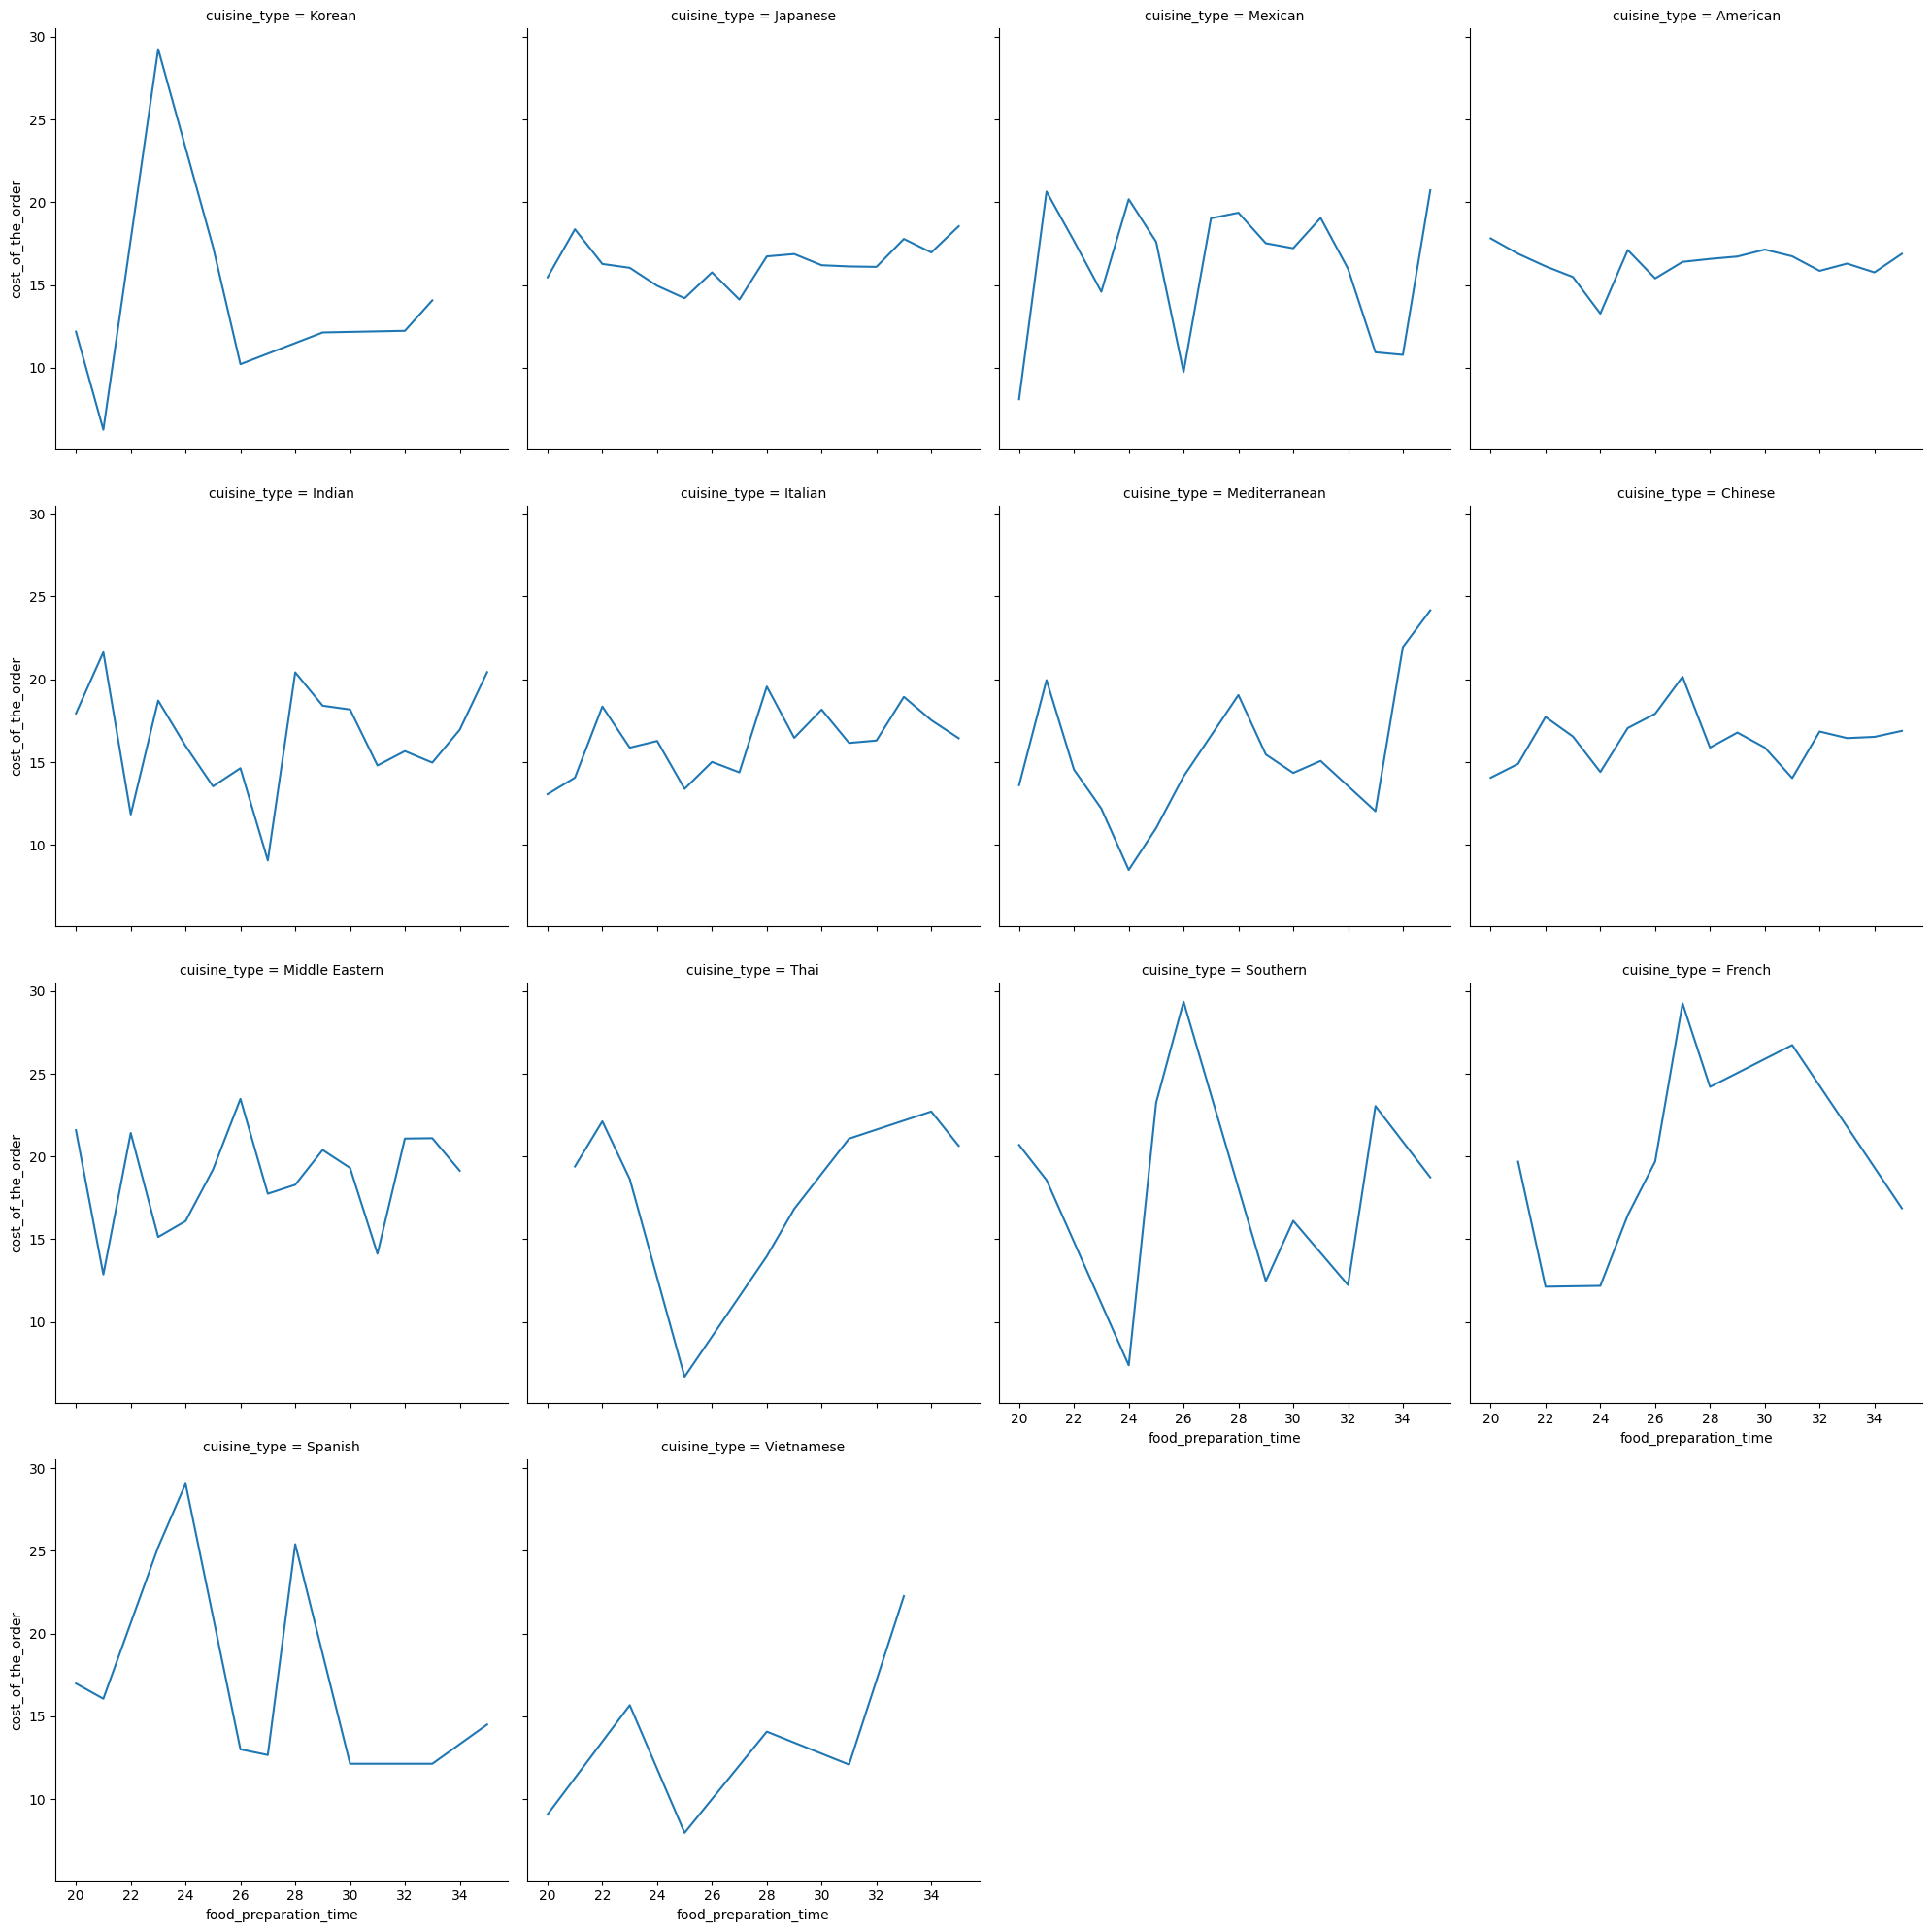

In [110]:
sns.relplot(data=df,x='food_preparation_time',y='cost_of_the_order',col='cuisine_type',kind='line', errorbar=None, col_wrap=4)
plt.show()

* Generally there is no corelationship between food preparation time and cost of the order across all cuisines

#### 2. Cost of Order vs Delivery Time
#### 3. Food preparation Type vs Delivery Time

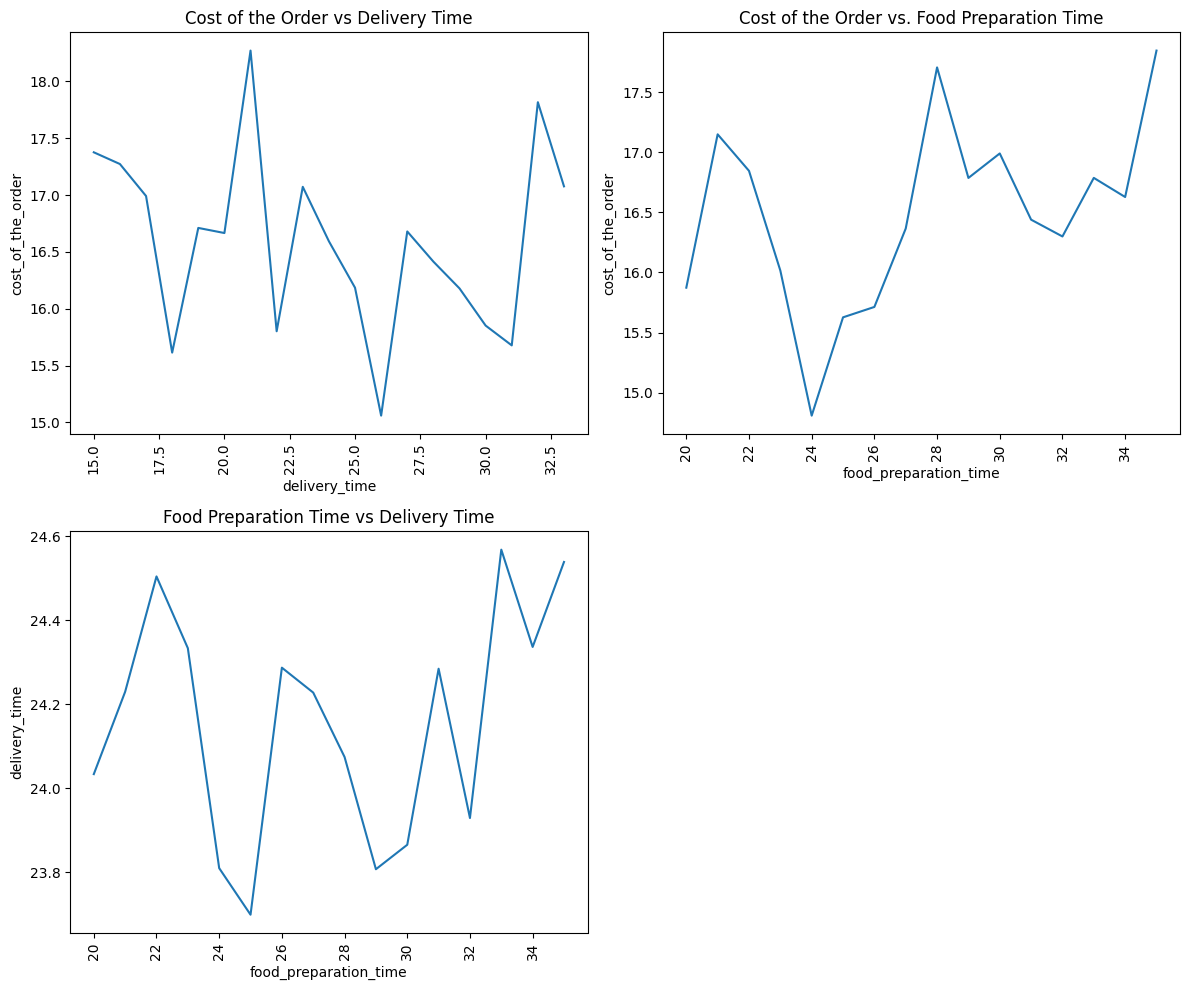

In [113]:

plt.figure(figsize=(12, 10))

# Lineplot for Cost of the Order vs Delivery Time
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x="delivery_time", y="cost_of_the_order", errorbar=None)
plt.xticks(rotation=90)
plt.title('Cost of the Order vs Delivery Time')

# LinePlot for Cost of the Order vs. Food Preparation Time
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x="food_preparation_time", y="cost_of_the_order", errorbar=None)
plt.xticks(rotation=90)
plt.title('Cost of the Order vs. Food Preparation Time')


# LinePlot for Food Preparation Time vs Delivery Time
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x="food_preparation_time", y="delivery_time", errorbar=None)
plt.xticks(rotation=90)
plt.title('Food Preparation Time vs Delivery Time')


plt.tight_layout()
plt.show()


* For orders taking longer than 24minutes to prepare, the average cost tends to increase with time. Average delivery time also tends to rise 

#### 4. Correlationships among numeric variables

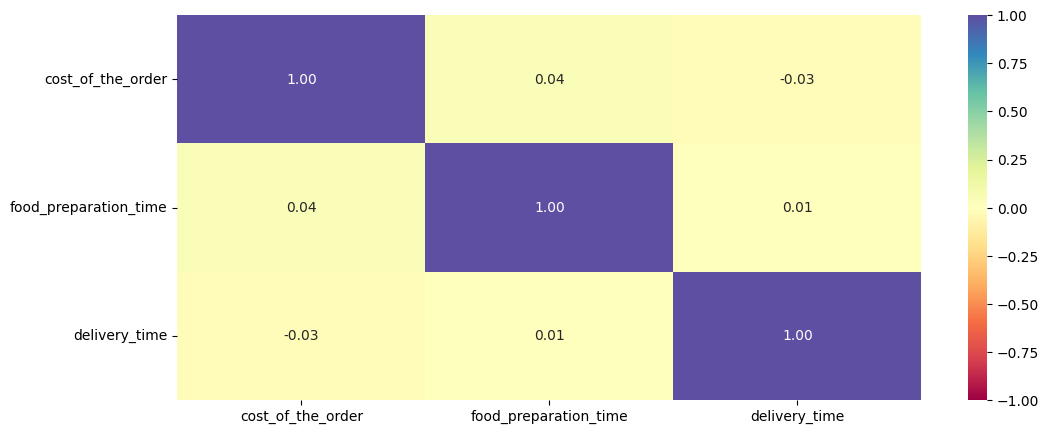

In [115]:
corr_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(12, 5))
sns.heatmap(df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### a. Observation on Multivariate Analysis between Numericals
* There is very weak correlation among the numerical variables with the corelations centralised below 0.01. 
* However, food preparation time has the strongest corelation with cost of the order at 0.04

### b. Multivariate analysis on Numericals vs Categoricals

#### 1. Cusine Type

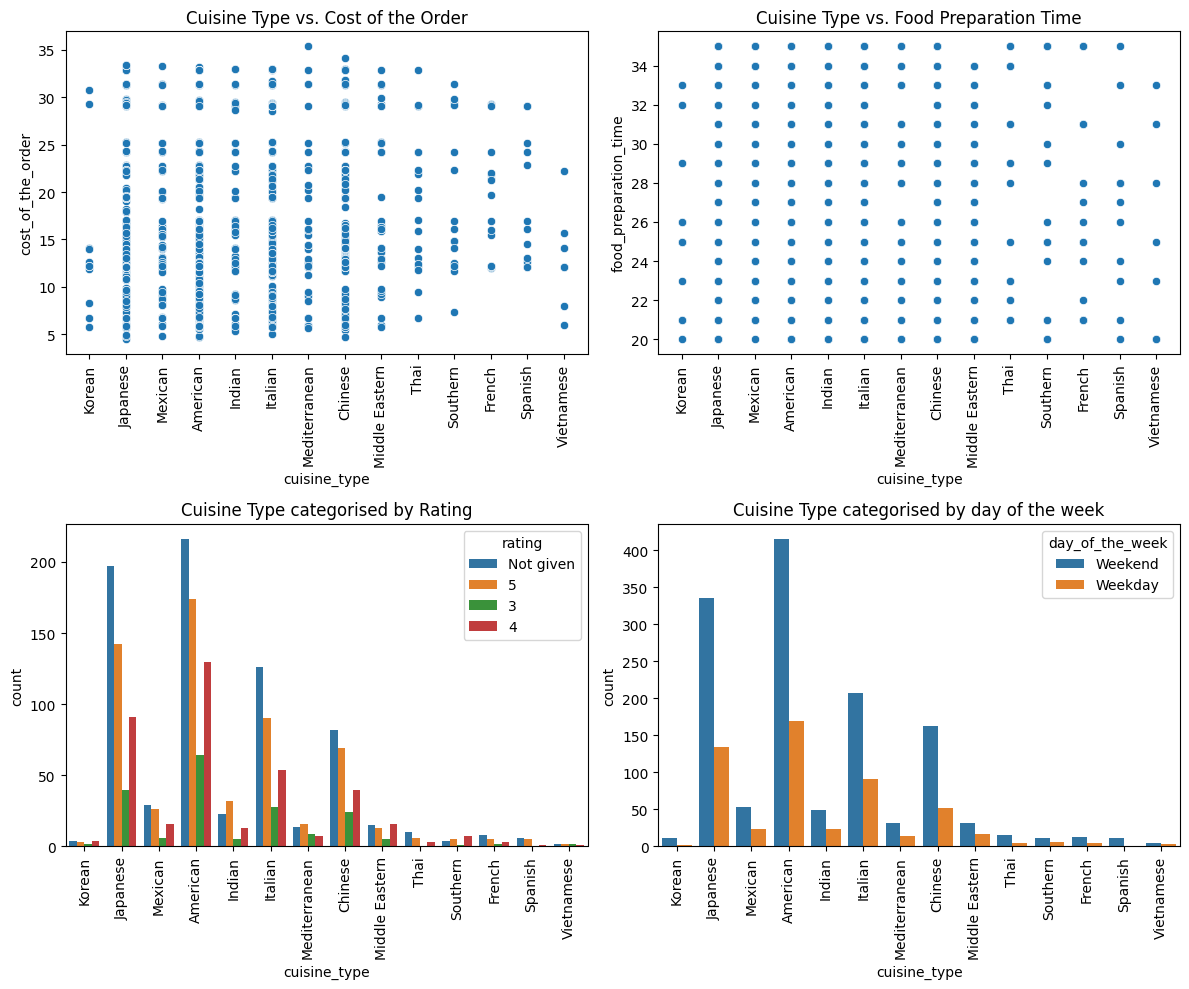

In [86]:
# Write the code here

plt.figure(figsize=(12, 10))

# Scatterplot for cuisine_type vs. cost_of_the_order
plt.subplot(2, 2, 1)
sns.scatterplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Cuisine Type vs. Cost of the Order')

# Scatterplot for cuisine_type vs. food_preparation_time
plt.subplot(2, 2, 2)
sns.scatterplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=90)
plt.title('Cuisine Type vs. Food Preparation Time')

plt.subplot(2, 2, 3)
sns.countplot(x='cuisine_type', hue='rating', data=df)
plt.xticks(rotation=90)
plt.title('Cuisine Type categorised by Rating')

plt.subplot(2, 2, 4)
sns.countplot(x='cuisine_type', hue='day_of_the_week', data=df)
plt.xticks(rotation=90)
plt.title('Cuisine Type categorised by day of the week')

plt.tight_layout()
plt.show()

* There is no corelation between cuisine type and either cost of the order, or food preparation time
* Japanese and American Cuisine are the most popular and highly rated cuisine both weekends and weekdays

#### 2. Day of the week

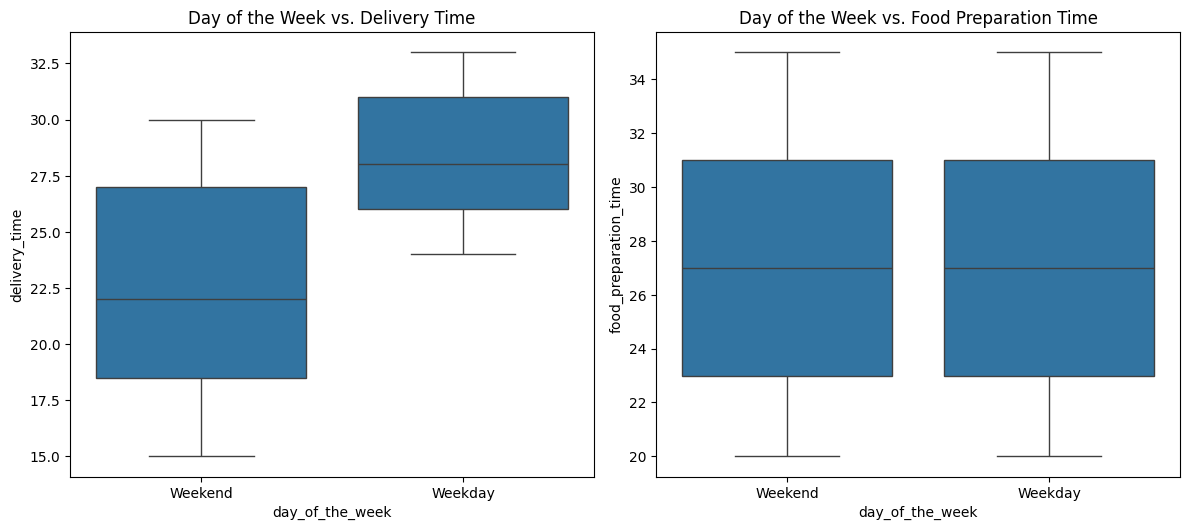

In [95]:

plt.figure(figsize=(12, 10))
# Boxplot for day_of_the_week vs. rating
plt.subplot(2, 2, 1)
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.title('Day of the Week vs. Delivery Time')

# Boxplot for day_of_the_week vs. delivery_time
plt.subplot(2, 2, 2)
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.title('Day of the Week vs. Food Preparation Time')


plt.tight_layout()
plt.show()

* 75% of weekday orders take more than 25minutes to deliver
* More than 25% of weekday orders take more than 30minutes to deliver which is above the weekend maximum of 30minutes
* Food prepation time is distributed evenly between weekends and weekdays

#### 3. Rating

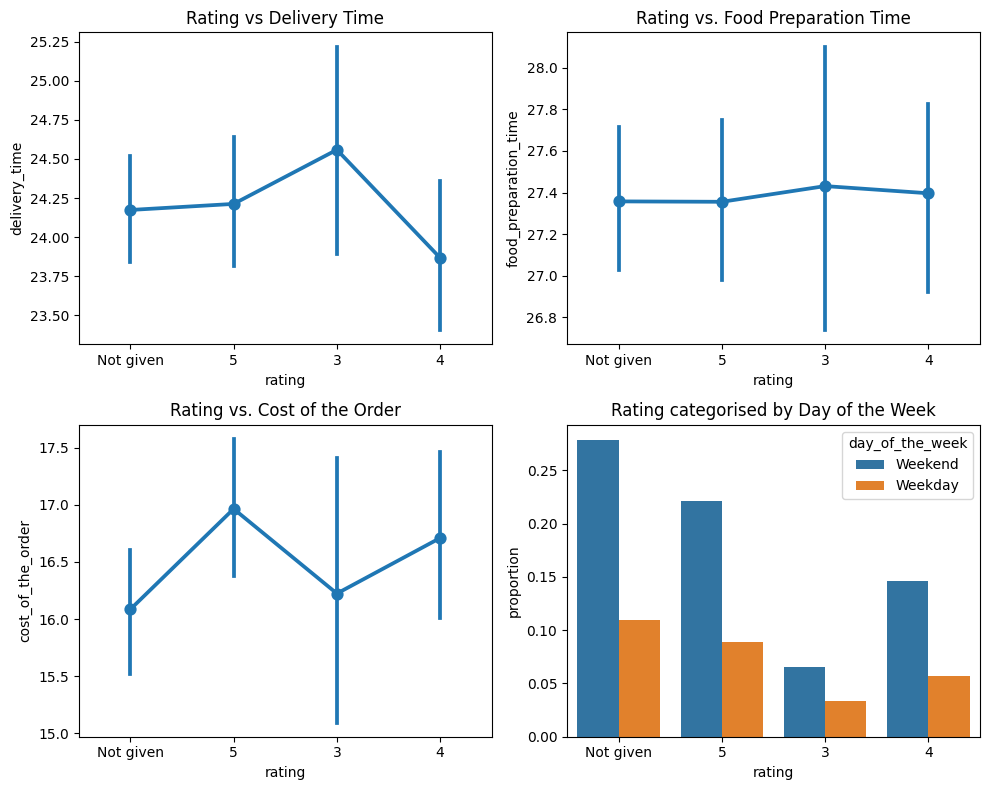

<Figure size 1500x700 with 0 Axes>

In [119]:
plt.figure(figsize=(10, 8))
# pointplot for day_of_the_week vs. rating
plt.subplot(2, 2, 1)
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('Rating vs Delivery Time')

# pointplot for day_of_the_week vs. delivery_time
plt.subplot(2, 2, 2)
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.title('Rating vs. Food Preparation Time')

# pointplot for rating vs. cost of the order
plt.subplot(2, 2, 3)
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.title('Rating vs. Cost of the Order')

plt.subplot(2, 2, 4)
sns.countplot(data=df,hue='day_of_the_week',x='rating', stat="proportion")
plt.title('Rating categorised by Day of the Week')

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 7))
plt.show()

* Orders with the highest average delivery time are rated 3
* Orders with the highest average cost are rated 5
* Food preparation time does not seem to have any correlation with rating

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [146]:
# Write the code here
#treat the not given ratings
df['rating'] = df['rating'].replace(['Not given'], np.nan).astype("float")

# Calculate the mean rating and ratings count for each restaurant
df["average_rating"] = df.groupby("restaurant_name")["rating"].transform("mean").dropna()
df["rating_count"] = df.groupby("restaurant_name")["rating"].transform("count").dropna()

# Filter the DataFrame based on the mean ratings and ratings count
promotional_list = df.loc[(df["average_rating"] > 4) & (df["rating_count"] > 50), ["restaurant_name", "rating_count", "average_rating"]]
# Remove duplicate rows based on the "restaurant_name" column
promotional_list = promotional_list.drop_duplicates(subset=["restaurant_name", "rating_count", "average_rating"])
print("*" * 60)
print("A. Promotional List by average rating\n", promotional_list.sort_values(by=["average_rating", "rating_count"], ascending=False).reset_index(drop=True))
print("*" * 60)
print("B. Promotional List by rating count\n", promotional_list.sort_values(by=["rating_count"], ascending=False).reset_index(drop=True))



************************************************************
A. Promotional List by average rating
              restaurant_name  rating_count  average_rating
0          The Meatball Shop            84        4.511905
1  Blue Ribbon Fried Chicken            64        4.328125
2                Shake Shack           133        4.278195
3          Blue Ribbon Sushi            73        4.219178
************************************************************
B. Promotional List by rating count
              restaurant_name  rating_count  average_rating
0                Shake Shack           133        4.278195
1          The Meatball Shop            84        4.511905
2          Blue Ribbon Sushi            73        4.219178
3  Blue Ribbon Fried Chicken            64        4.328125


#### Observations: Four restaurants have been discovered which meet the criteria to get the promotional offer
These are
* The Meatball Shop	          
* Blue Ribbon Fried Chicken	  
* Shake Shack	              
* Blue Ribbon Sushi	          


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [147]:
# Write the code here
# Set the revenue percentages then calculate the revenue for each order then sum
df["revenue_percentage"] = 0
df["revenue_percentage"] =  np.where(df["cost_of_the_order"] > 5, 0.15, df["revenue_percentage"])
df["revenue_percentage"] =  np.where(df["cost_of_the_order"] > 20, 0.25, df["revenue_percentage"])
df["revenue"] = df["revenue_percentage"] *  df["cost_of_the_order"]
df.revenue.sum()

3865.572

#### Observations:
* Accross all the orders, the comapny has generated a revenue of $3, 865.57 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [161]:
# Write the code here
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

long_orders = round(df.loc[df["total_time"]>60]["order_id"].count() / df.shape[0] * 100, 1)
print("Long orders percentage", long_orders)

Long orders percentage 10.2


#### Observations:
* 10.2% of all orders take more than 60minutes to get delivered fom the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [162]:
# Write the code here
weekday_delivery_time = (df[df["day_of_the_week"] == "Weekday"] ["delivery_time"].mean())
weekend_delivery_time = (df[df["day_of_the_week"] == "Weekend"] ["delivery_time"].mean())
print("Difference between delivery times", round(weekday_delivery_time - weekend_delivery_time, 1))

Difference between delivery times 5.9


#### Observations:
* Mean delivery time is longer during weekdays than it is during weekends by 5.9 minutes. 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The most popular restaurants are Shake Shack, The Meatball Shop and Blue Ribbon Sushi, having orders of more than 100
* The most popular cuisine are American, Japanese, Italian and Korean. This applies both on weekends and weekdays
* Weekends are the most busy days with more than two thirds of the total orders
* On average, it takes longer to deliver orders during weekdays than it does during weekends
* Orders with longer delivery times have a lower rating than quicker ones.
* Orders which are not rated, tend to have standard delivery time, food preparation time and low cost. 

### Recommendations:

* Ensure that the smartphone app and delivery staff are optimized to handle the high demand for Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.
* Emphasize and promote the popular American, Japanese, Italian, and Korean cuisine options to cater to customer preferences.
* Allocate more delivery staff and improve delivery capacity to handle the increased order volume during the weekends, which account for over two-thirds of the total orders.
* Implement strategies to streamline the delivery process, such as optimizing delivery routes, increasing driver capacity
* Invest in technology solutions that can optimize delivery routes and schedules to improve efficiency and responsiveness.
* Investigate the reasons for longer delivery times during weekdays. There could be more variables involved than provided such as distance from pickup to drop off point.
* Develop strategies to encourage customers to provide feedback, such as offering incentives or making the rating process more seamless.


---